In [1]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import cv2 #openCV

In [3]:
cat4 = cv2.imread('D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/train/CAT/4.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

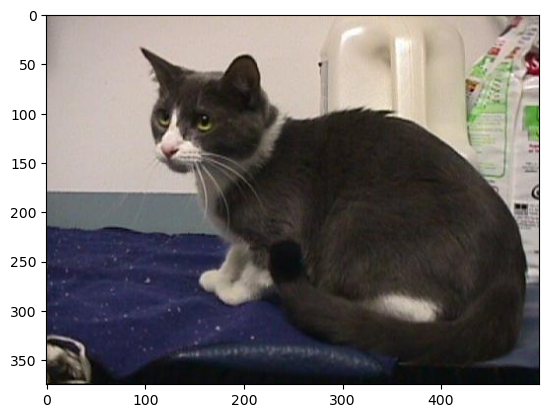

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog2 = cv2.imread('D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/train/DOG/2.jpg')

In [8]:
dog2.shape

(199, 188, 3)

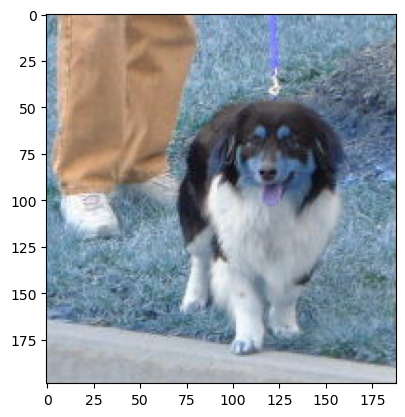

In [9]:
plt.imshow(dog2)

# Image Manipulation

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen= ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.15,
                             rescale=1/255,   #normalization
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

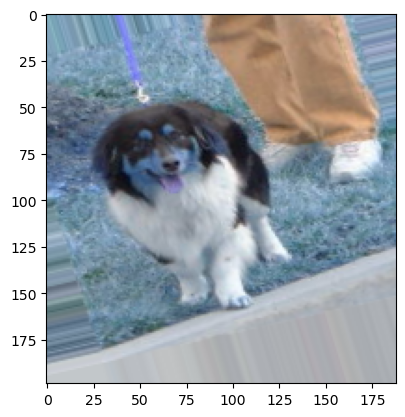

In [12]:
plt.imshow(image_gen.random_transform(dog2))

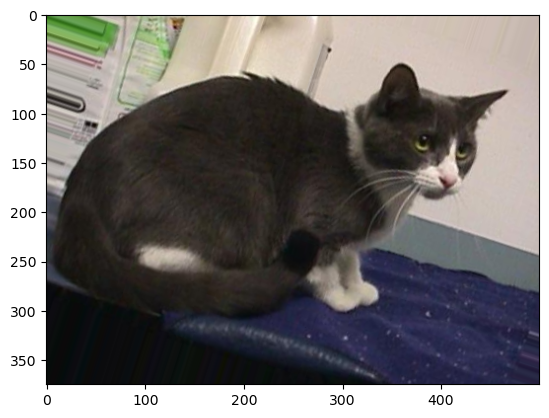

In [13]:
plt.imshow(image_gen.random_transform(cat4))

In [14]:
image_gen.flow_from_directory('D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/train')

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory('D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/test')

Found 6251 images belonging to 2 classes.


In [16]:
image_shape = (150,150,3)

In [17]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [20]:
batch = 16

train_image_gen = image_gen.flow_from_directory('D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/train',
                                               target_size=(150,150),
                                               batch_size=batch,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
batch = 16

test_image_gen = image_gen.flow_from_directory('D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/test',
                                               target_size=(150,150),
                                               batch_size=batch,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [24]:
results = model.fit_generator(train_image_gen, epochs=1,
                             steps_per_epoch=150,
                             validation_data=test_image_gen,
                             validation_steps=12)

C:\Users\maaza\AppData\Local\Temp\ipykernel_4984\604085358.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=1,




150/150 [==============================] - 119s 763ms/step - loss: 0.7567 - accuracy: 0.5337 - val_loss: 0.6975 - val_accuracy: 0.4948


In [25]:
results.history['accuracy']

[0.5337499976158142]

In [26]:
from keras.models import load_model

In [27]:
new_model = load_model('D:\Data Science Bootcamp\Computer Vision\Session 04\cat_dog_100epochs.h5')

In [30]:
dog_file = 'D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/test/DOG/9914.jpg'

In [31]:
from keras.preprocessing import image

dog_img = image.load_img(dog_file, target_size = (150,150))

In [34]:
dog_file = image.img_to_array(dog_img)

In [35]:
dog_file.shape

(150, 150, 3)

In [37]:
import numpy as np

dog_img = np.expand_dims(dog_file, axis=0)

In [38]:
dog_img.shape

(1, 150, 150, 3)

In [39]:
dog_img = dog_img/255

In [40]:
prediction_prob = new_model.predict(dog_img)

1/1 [==============================] - 0s 260ms/step


In [41]:
print(prediction_prob)

[[0.7332228]]


In [42]:
predictions = new_model.predict(dog_img)

predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 94ms/step


In [43]:
print(predicted_classes)

[0]


In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess your test image (adjust the path accordingly)
img_path = 'D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/test/DOG/9914.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Use model to make predictions
predictions = new_model.predict(img)

# Apply a threshold (e.g., 0.5) to get the predicted class label
predicted_class = (predictions > 0.5).astype(int)[0][0]

# Print the predicted class label (0 for cat, 1 for dog)
if predicted_class == 0:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")

1/1 [==============================] - 0s 82ms/step
Predicted class: Dog


# Transfer Learning

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = 'D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/train'
test_dir = 'D:/Data Science Bootcamp/Computer Vision/Session 03/Cats and Dogs/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.
58889256/58889256 [==============================] - 66s 1us/step


Epoch 1/10
 137/1172 [==>...........................] - ETA: 18:07 - loss: 0.5136 - accuracy: 0.7705

KeyboardInterrupt: 